# Part 1

In [108]:
import numpy as np

In [113]:
class moonsOfJupiter():
    def __init__(self, input_line):
        self.position = self.parse_input(input_line)
        self.velocity = [0, 0, 0]
        
        self.dv = [0, 0, 0]
        
        self.position_history = np.zeros((3, 10000))
        
    def parse_input(self, input_line):
        input_line = input_line[1:-2].split(', ')
        
        x = int(input_line[0][2:])
        y = int(input_line[1][2:])
        z = int(input_line[2][2:])
        
        return [x, y, z]
    
    def calculate_v_update(self, moon1, moon2, moon3):
        for i in range(3):
            self.dv[i] = self.calculate_increment(self.position[i], moon1.position[i]) + \
                         self.calculate_increment(self.position[i], moon2.position[i]) + \
                         self.calculate_increment(self.position[i], moon3.position[i])
    
    def calculate_increment(self, one, two):
        if (one<two):
            return 1
        elif(one>two):
            return -1
        else:
            return 0
        
    def update_pv(self):
        for i in range(3):
            self.velocity[i] += self.dv[i]
        for i in range(3):
            self.position[i] += self.velocity[i]
            
        self.dv = [0, 0, 0]
        
    def calculate_pe(self):
        pe = 0
        for i in range(3):
            pe += abs(self.position[i]) 
        return pe
    
    def calculate_ke(self):
        ke = 0
        for i in range(3):
            ke += abs(self.velocity[i]) 
        return ke
    
    def calculate_te(self):
        '''calculate total energy'''
        total_energy = self.calculate_pe() * self.calculate_ke()
        return total_energy
    
    def print_pv(self):
        print([self.position[0], self.position[1], self.position[2], self.velocity[0], self.velocity[1], self.velocity[2]])

In [96]:
input_file = 'day12_input.txt'
# input_file = 'day12_test_input.txt'
with open(input_file, 'r') as f:
    lines = f.readlines()
    
# Setting initial positions and velocities for the moons
io = moonsOfJupiter(lines[0])
europa = moonsOfJupiter(lines[1])
ganymede = moonsOfJupiter(lines[2])
callisto = moonsOfJupiter(lines[3])

In [99]:
# Let's simulate the trajectories!
for i in range(1000):
    io.calculate_v_update(europa, ganymede, callisto)
    europa.calculate_v_update(io, ganymede, callisto)
    ganymede.calculate_v_update(io, europa, callisto)
    callisto.calculate_v_update(io, europa, ganymede)
    
    io.update_pv()
    europa.update_pv()
    ganymede.update_pv()
    callisto.update_pv() 

In [100]:
print(io.calculate_te() + ganymede.calculate_te() + europa.calculate_te() + callisto.calculate_te())

11384


# Part 2

In [114]:
# input_file = 'day12_input.txt'
input_file = 'day12_test_input.txt'
with open(input_file, 'r') as f:
    lines = f.readlines()
    
# Setting initial positions and velocities for the moons
io = moonsOfJupiter(lines[0])
europa = moonsOfJupiter(lines[1])
ganymede = moonsOfJupiter(lines[2])
callisto = moonsOfJupiter(lines[3])

In [116]:
# Let's simulate the trajectories!
positionHistory = set()
iteration = 0

for i in range(10000):
    
    io.position_history[:, iteration] = io.position
    ganymede.position_history[:, iteration] = ganymede.position
    europa.position_history[:, iteration] = europa.position
    callisto.position_history[:, iteration] = callisto.position
    
    
#     currentPositionVector = (io.position[0], io.position[1], io.position[2], \
#                              europa.position[0], europa.position[1], europa.position[2], \
#                              ganymede.position[0], ganymede.position[1], ganymede.position[2], \
#                              callisto.position[0], callisto.position[1], callisto.position[2], \
#                              io.velocity[0], io.velocity[1], io.velocity[2], \
#                              europa.velocity[0], europa.velocity[1], europa.velocity[2], \
#                              ganymede.velocity[0], ganymede.velocity[1], ganymede.velocity[2], \
#                              callisto.velocity[0], callisto.velocity[1], callisto.velocity[2] \
#                             )
    
#     if currentPositionVector not in positionHistory:
#         positionHistory.add(currentPositionVector)
#     else:
#         print(iteration)
#         break
    
    io.calculate_v_update(europa, ganymede, callisto)
    europa.calculate_v_update(io, ganymede, callisto)
    ganymede.calculate_v_update(io, europa, callisto)
    callisto.calculate_v_update(io, europa, ganymede)
    
    io.update_pv()
    europa.update_pv()
    ganymede.update_pv()
    callisto.update_pv()
    iteration += 1

In [117]:
import matplotlib.pyplot as plt

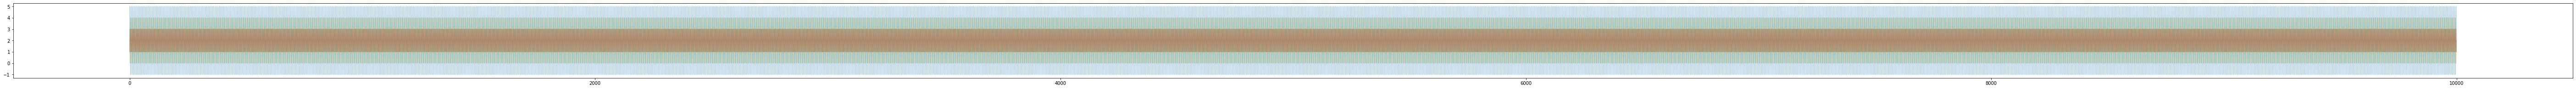

In [125]:
plt.figure(figsize = (100, 3))
plt.plot(io.position_history[0, :], alpha = 0.3)
plt.plot(ganymede.position_history[0, :], alpha = 0.3)
plt.plot(europa.position_history[0, :], alpha = 0.3)
plt.plot(callisto.position_history[0, :], alpha = 0.3)